### Algorithme des $k$-moyennes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

On donne la fonction suivante :

In [2]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2))
    X = X*np.array([sx,sy])
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]]) #matrice de rotation
    X = X@r #multiplication matricielle
    X = X+np.array([mx,my])
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

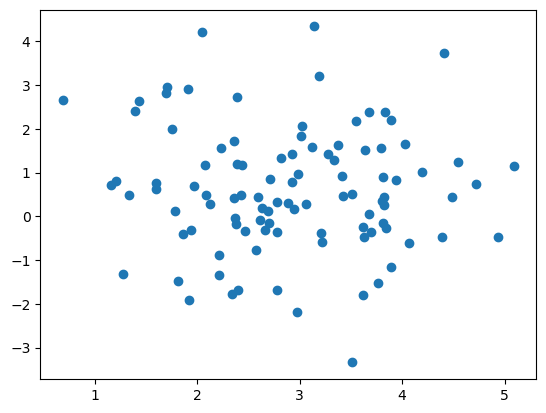

In [3]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
points=generate(100,3,1,0.5,1.5,0)
# plt.figure()
# plt.hist(points[:,0])
# plt.figure()
# plt.hist(points[:,1])
plt.figure()
plt.scatter(points[:,0],points[:,1])

(-5.0, 5.0)

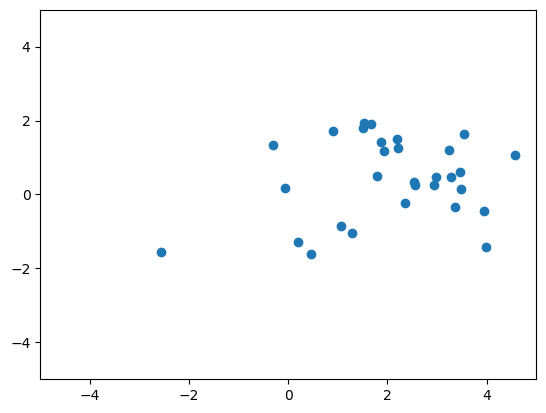

In [4]:
points=generate(30,2,1,0.5,1.5,np.pi/3)
plt.figure()
plt.scatter(points[:,0],points[:,1])
plt.xlim([-5,5])
plt.ylim([-5,5])

Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [5]:
X1 = generate(30,2,1,3,3,np.pi/3)
X2 = generate(30,-3,1,5,2,-np.pi/4)
X3 = generate(30,7,2,4,0.3,np.pi/4)

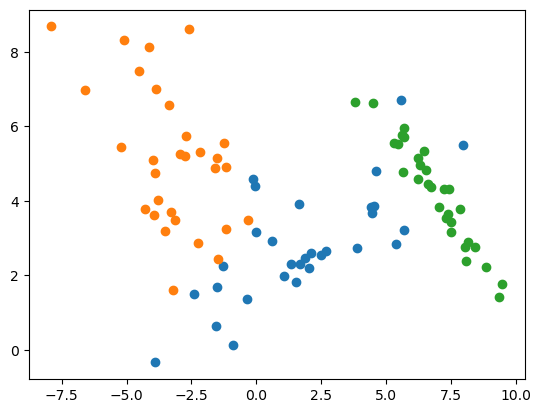

In [6]:
plt.figure()
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

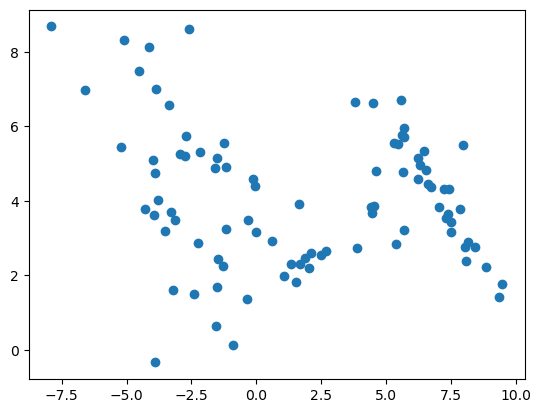

In [7]:
X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)
plt.scatter(X[:,0],X[:,1])

In [11]:
df=pd.DataFrame({'x1':X[:,0],'x2':X[:,1]})
df.head()

,x1,x2
0,5.713392,5.716050
1,-2.166648,5.301619
2,-4.311861,3.776439
3,2.044742,2.189481
4,7.501691,3.175718


Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [12]:
df['cluster']=np.random.randint(0,3,len(df))
df

,x1,x2,cluster
0,5.713392,5.716050,1
1,-2.166648,5.301619,2
2,-4.311861,3.776439,0
3,2.044742,2.189481,1
4,7.501691,3.175718,0
...,...,...,...
85,4.462387,3.677454,0
86,0.607765,2.916379,0
87,1.084584,1.970332,2
88,-3.522970,3.191482,0


In [85]:
df[df['cluster']==2][['x1','x2']]

,x1,x2
1,5.979164,3.452018
2,-5.464820,5.368066
4,-0.618447,2.619427
5,8.635347,1.401657
6,6.286576,4.387264
9,7.198061,3.367491
11,-0.762799,2.197795
12,-3.547874,1.706591
13,4.843871,6.051312
14,4.312979,5.127879


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [13]:

means={i:(df[df['cluster']==i]['x1'].sum()/len(df[df['cluster']==i]['x1']),df[df['cluster']==i]['x2'].sum()/len(df[df['cluster']==i]['x2'])) for i in df['cluster'].unique()}
means

{1: (3.4780429473325247, 3.6101730548674587),
 2: (0.8517841444143929, 4.653730849050265),
 0: (1.0960994278894818, 3.8835154686551863)}

In [14]:
m=df.groupby('cluster').mean()
mean={i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
mean

{0: (1.0960994278894818, 3.883515468655186),
 1: (3.4780429473325247, 3.610173054867458),
 2: (0.8517841444143929, 4.653730849050265)}

In [15]:
import time
start_time = time.time()
m=df.groupby('cluster').mean()
{i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008996725082397461 seconds ---


Implantez une fonction calculant la distance euclidienne entre deux points

In [16]:
def dist(p1,p2):
    return np.sqrt(sum((p2-p1)**2))

In [17]:
p1=np.array([2,3])
p2=np.array([3,4])
dist(p1,p2)

1.4142135623730951

Implantez une fonction qui pour un point donné, retourn la clé associée à la moyenne la plus proche

In [18]:
def moyenneProche(p,means):
    return [i for i in means.keys()
             if dist(np.array(p),means.get(i))==min([dist(np.array(p),means.get(j)) 
                                                    for j in means.keys()])][0]

In [19]:
moyenneProche([2,2],means)

0

Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [20]:
#df['new_cluster']=np.vectorize(moyenneProche)(df[['x1','x2']],means)
df['new_cluster']=df[['x1','x2']].apply(lambda df:moyenneProche(df[['x1','x2']],means),axis=1)

In [21]:
df

,x1,x2,cluster,new_cluster
0,5.713392,5.716050,1,1
1,-2.166648,5.301619,2,2
2,-4.311861,3.776439,0,2
3,2.044742,2.189481,1,0
4,7.501691,3.175718,0,1
...,...,...,...,...
85,4.462387,3.677454,0,1
86,0.607765,2.916379,0,0
87,1.084584,1.970332,2,0
88,-3.522970,3.191482,0,2


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

In [22]:
df['cluster']=np.random.randint(0,3,len(df))
m=df.groupby('cluster').mean()
mean={i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
df['new_cluster']=np.vectorize(moyenneProche)(df[['x1','x2']],mean)
while((df['cluster']!=df['new_cluster']).any()):
    df['cluster']=df['new_cluster']
    m=df.groupby('cluster').mean()
    mean={i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
    df['new_cluster']=df[['x1','x2']].apply(lambda df:moyenneProche(df[['x1','x2']],mean),axis=1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

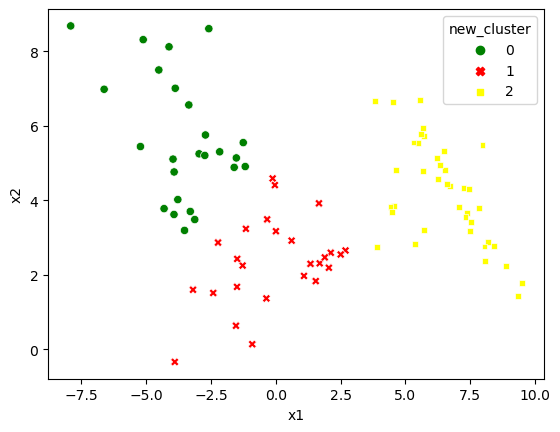

In [23]:
sns.scatterplot(x=df['x1'],y=df['x2'],data=df,style='new_cluster',hue='new_cluster',palette=['green','red','yellow'])

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

In [24]:
df['cluster']=np.random.randint(0,3,len(df))
m=df.groupby('cluster').mean()
mean={i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
df['new_cluster']=np.vectorize(moyenneProche)(df[['x1','x2']],mean)
while((df['cluster']!=df['new_cluster']).any()):
    df['cluster']=df['new_cluster']
    m=df.groupby('cluster').mean()
    mean={i:(m.loc[i,'x1'],m.loc[i,'x2']) for i in m.index}
    df['new_cluster']=df[['x1','x2']].apply(lambda df:moyenneProche(df[['x1','x2']],mean),axis=1)

In [26]:
sns.scatterplot(x=df['x1'],y=df['x2'],data=df,style='new_cluster',hue='new_cluster',palette=['green','red','yellow'])

ValueError: The palette list has the wrong number of colors.

Définissez une fonction qui calcule la somme des distances intra-clusters.

In [27]:
s={k:sum([dist(np.array([list(df[df['cluster']==k]['x1'])[i],list(df[df['cluster']==k]['x2'])[i]]),np.array([list(df[df['cluster']==k]['x1'])[j],list(df[df['cluster']==k]['x2'])[j]])) 
    for i in range(0,len(df[df['cluster']==k])) 
   for j in range(i+1,len(df[df['cluster']==k]))])for k in df['cluster'].unique() }

In [28]:
df['x1'].mean()

1.8059275589512984

In [29]:
dff=pd.DataFrame({'x1':[-1,-0.5,0,0.5,1],'x2':[-1,0,0.5,-0.5,1],'cluster':[1,1,2,2,1]})
dff

,x1,x2,cluster
0,-1.0,-1.0,1
1,-0.5,0.0,1
2,0.0,0.5,2
3,0.5,-0.5,2
4,1.0,1.0,1


In [30]:
def calculDist(p1,p2):
    return np.sqrt(sum((p1-p2)**2))

def claculmean(df,classe,feat):
    m=df.groupby(classe).mean()[feat]
    return {i:list(m.loc[i]) for i in  m.index}

def plusProche(feat,m):
    return [k for k in  m.keys() if calculDist(m.get(k),np.array(feat))==
                            min([calculDist(m.get(j),np.array(feat)) 
                                 for j in  m.keys()])][0]
def k_moyenne(df,classe,feat):
    m=claculmean(df,classe,feat)
    df['new_cluster']=np.vectorize(moyenneProche)(df[feat],m)
    while(df['cluster'].all()!=df['new_cluster'].all()):
        df['cluster']=df['new_cluster']
        df['new_cluster']=np.vectorize(plusProche)(df[feat],claculmean(df,classe,feat))
    return df

In [31]:
k_moyenne(dff,'cluster',['x1','x2'])

ValueError: Expected a 1D array, got an array with shape (5, 2)

In [46]:
def pp(s):
    return 'a'

In [57]:
t

NameError: name 't' is not defined

In [ ]:
dff

,x1,x2,cluster
0,-1.0,-1.0,1
1,-0.5,0.0,1
2,0.0,0.5,2
3,0.5,-0.5,2
4,1.0,1.0,1
